## DS807: Applied machine learning
Christian M. Dahl. cmd@sam.sdu.dk.

## Introduction to neural networks

Notes: For the purpose of this notebook, DLWP refers to Deep Learning with Python by Francois Collet.

## Program

*Note that this lecture covers both September 30th and October 7th. I have decided to keep it in one set of slides, as the topics are so interdependent, and I believe it will make easier reading for you once you want to prepare for the exam or go back and look through some old material.*

After this lecture, you will:
1. Know what distinguishes deep learning from machine learning in general.
1. Be familiar with the basics of fully connected neural networks, including how to build and train them.
1. Know how to use fully connected neural networks to solve classification and regression problems.
1. Have applied your knowledge to solve problems within classification and regression using fully connected neural networks.

## Machine learning in general

To perform any kind of machine learning, we need:
1. Data.
1. A model (such as an SVM, DT, RF, etc.).
1. A criterium to optimize (i.e. a measure of success, such as MSE).
1. A method to perform optimization (greedy search, evolution, gradient based methods, etc.).

Deep learning is a **subset** of machine learning. It still has all the general features of machine learning.

## Artificial intelligence, machine learning, and deep learning

<img src="./graphics/ai-ml-dl.png" alt="Drawing" style="width: 1800px;"/>

- Artificial intelligence is essentially a system that seems smart
    - On a basic level, artificial intelligence is where a machine seems human-like and can imitate human behavior. These behaviors include problem-solving, learning, and planning.

Source: "DLWP"

## Important notes on what is outdated from the book

Methods:
1. Chollet stresses neural networks and boosting as the two key techniques for machine learning. This is still true.
1. However, he stresses the Keras and the XGBoost libraries. This is not true: Keras is still used, but is part of TensorFlow, and XGBoost is starting to be outdated.

Frameworks:
1. Chollet notes three backends for Keras: TensorFlow, Theano, and CNTK.
1. Today, Keras is directly a part of TensorFlow.
1. Theano and CNTK are not used. The same is true for Caffe (a formerly popular framework).
1. The second most important framework (after TensorFlow) to know for deep learning is PyTorch. This is also one of my favorite python libraries.

## The "deep" in deep learning

<img src="./graphics/deep-nn.png" alt="Drawing" style="width: 1800px;"/>

- Layered representations learning
- "deep" refers to the number of successive layers

Source: "DLWP"


# Deep learning incrementally improves representations

<img src="./graphics/deep-nn-representations.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## A neural network and its parameters...

<img src="./graphics/nn-parameters.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## ... and how to use a loss function and an optimizer to find the best parameters

<img src="./graphics/nn-optimizer.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## What is a neural network?

A neural network is a mathematical function. For example, a neural network may be the simple linear function:

$f(x) = ax + b$

However, in practice the functions represented by neural networks are *very* complex, with thousands, millions, *or even billions* of parameters.

Importantly, these functions are in general so complex, that they can ***approximate any function*** (under certain restrictions and up to arbitrary high precision).

Here, a functions can be literally anything. That is, this proof is extremely powerful, proving that neural networks can drive cars, perform surgery, play any game, and do ***all of these at a near-to-human level***. In theory...

## Status today

1. Near-to-human level image classification.
1. Near-to-human level speech recognition.
1. Near-to-human level handwriting transcription.
1. Near-to-human level autonomous driving.
1. Digital assistants such as Google Assistant and Amazon Alexa
1. Dramatically improved machine translation.
1. Dramatically improved text-to-speech conversion.
1. Perform effective ad targeting.
1. ... and much more.

## Building blocks of neural networks

In general, neural networks consist of two building blocks, alternating after each other (hierarchically/layered).

1. Linear transformations (like linear regression).
1. Nonlinear transformations.

Now, there are various additions, but these are minor tweaks.

The main take-away: the building blocks of neural networks are **simple**. The complexity of neural networks emerges as you combine these two building blocks.

It's like lego. The building blocks are simple. Everyone can use them. But building something impressive requires a lot of thoughts on *how* to combine the blocks.

The good thing: If this is something you find fun, tinkering with neural networks really is great.

## Linear transforms

By linear transforms I refer to matrix multiplication. Let your features be denoted $X^{(0)}$. Then, a linear transform (resulting in $X^{(1)}$) might take the form:

$X^{(1)} = X^{(0)}W^{(0)} + b^{(0)}$

Where $X^{(0)}$ is $(n, k^{(0)})$, $W^{(0)}$ is $(k^{(0)}, k^{(1)})$, $b^{(0)}$ is $(1, k^{(1)})$, and $X^{(1)}$ is $(n, k^{(1)})$.

Here, the 0 and 1 indicate that 0 is the input, 1 is after 1 transformation, and we'd then use 2 after the second transformation, etc. The exact notation varies a bit between sources here.

## Linear transforms

<img src="./graphics/matrix-dot-product.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## Nonlinear transforms

Between each linear transformation, we use a nonlinear transformation.

Why? Multiple linear transformations after each other are equivalent to **one** linear transformation. Hence, it does not do anything to place multiple linear transformations after each other!

So it is crucial we place nonlinearities if we plan to model anything that is not linear. Which we do!

But which nonlinearity? Just a small, simple one! Basically a simple, **element-wise** nonlinearity.

## Sigmoid - the "old" nonlinearity

<img src="./graphics/sigmoid.png" alt="Drawing" style="width: 800px;"/>
Source: "DLWP"

## Rectified linear unit (ReLU) - the current nonlinearity

<img src="./graphics/relu.png" alt="Drawing" style="width: 800px;"/>
Source: "DLWP"

## Popular nonlinearities

1. ReLU. **The** choice. Almost always a good/the best idea.
1. Softmax. Used as the **last layer** when performing classification. It makes sure the outputs are all $\geq0$ and sum to $1$ (i.e. represent probabilities). Also useful in a few other settings.
1. Linear (by which *no transformation* is meant). Used when performing regression.
1. "ReLU-like". Lots of variants (ELU, leaky ReLU, parametric ReLU, swish). Occasionally useful.
1. Sigmoid. The historic choice. However, this it useful when you have a reason to "squeeze" the value to (0, 1), such as when estimating a ratio or a probability. Often used in **recurrent neural networks**, but also in quite some other cases.
1. Hyperbolic tangent. Useful when you want to "squeeze" a value to (-1, 1). Often used in **recurrent neural networks** and not much in other cases.

See https://www.tensorflow.org/api_docs/python/tf/keras/activations for an overview.

## Linear and nonlinear transformations together

So a network is a repitition of linear transform, nonlinear transform, linear transform, nonlinear transform, etc.

Often, the linear and nonlinear transformations are so "tied together" that they are simply implemented in the same step.

And then a lot of smaller tricks are used to help with regularization (not overfitting), "telling" the network about the structure of the data (i.e. we use some small tweaks for images, some other tweaks for time series, etc.), and so on and so forth.

But these are details (although they are important)! So let's look at how we build a network.

## Essential code to build neural networks using TensorFlow

1. To initialize a simple sequential model we use $\texttt{tf.keras.models.Sequential}$.
1. To implement a simple linear transformation with some activation we use $\texttt{tf.keras.models.layers.Dense}$.
1. After building a model, we need to **compile** it, where we use the method $\texttt{.compile}$. This is essentially to tell that we are "finished" with initializing our model, so it may be considered a part of the initialization process.
1. Training is exactly like with $\texttt{sklearn}$, i.e. we use the method $\texttt{.fit}$.
1. We can also predict much like as with $\texttt{sklearn}$, i.e. using the method $\texttt{.predict}$. However, to evaluate our model, it is easier to use the method $\texttt{.evaluate}$.
1. We can take a look at our model using the method $\texttt{.summary}$, which is super cool and useful!

**Note**: There are more advanced (but also more flexible) ways to initialize and train a model. However, the above "steps" are useful to solve most problems.

## Fully connected neural network achitecture

<img src="./graphics/Example-of-fully-connected-neural-network.png" alt="Drawing" style="width: 800px;"/>


In [1]:
import tensorflow as tf

our_first_nn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)), # input shape required in the first layer
    tf.keras.layers.Dense(128, activation='relu'), # map 64 to 128 features and apply ReLU
    tf.keras.layers.Dense(2, activation='softmax'), # softmax is used for classification
    ])

our_first_nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 10,562
Trainable params: 10,562
Non-trainable params: 0
_________________________________________________________________


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use the `load_breast_cancer` function to construct your dataset
x, y = load_breast_cancer(return_X_y=True)

# Use `train_test_split` to split your data into a train and a test set.
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

scaler = StandardScaler()
z_train = scaler.fit_transform(x_train)
z_test = scaler.transform(x_test)

In [3]:
our_first_nn.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

our_first_nn.fit(z_train, y_train, epochs=5)

loss, accuracy = our_first_nn.evaluate(z_test, y_test)

print(
    f'\nOut first neural network managed {round(accuracy * 100, 2)}% accuracy.'
)

Epoch 1/5
15/15 [==============================] - 2s 4ms/step - loss: 0.5575 - accuracy: 0.8747
Epoch 2/5
15/15 [==============================] - 0s 4ms/step - loss: 0.4413 - accuracy: 0.9319
Epoch 3/5
15/15 [==============================] - 0s 4ms/step - loss: 0.3669 - accuracy: 0.9495
Epoch 4/5
15/15 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.9473
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.2527 - accuracy: 0.9737

Out first neural network managed 97.37% accuracy.


## Exercise

Time to get you started!

1. Start by replicating the neural network in the slides (not the training - building it and using the method $\texttt{.summary}$. You can see the number of parameters in each layer. Can you relate this to the number of features, the number of hidden nodes, and the number of output nodes?
2. Do you believe the model has too many parameters? Too few? Try to change the number of parameters (in whichever direction you believe is best) and then train the model on the breast cancer data. Is your model better than the one in the slides? **Bonus**: try also to change the number of epochs you train for, as well as anything else you might want to experiment with.

**Note**: The number of epochs is the number of times the neural network sees each observation. In the above example, each observation is shown 5 times.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-nn-build.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Loss functions

A loss function is basically any function that measures the performance of your model (where lower values are better). Hence, which loss function to choose depends on what kind of problem you are trying to solve!

This may seem overwhelming: Which to choose? There are so many functions!

In practice, howevever, the choice is simple. 
1. For classification: Use cross entropy. $l=-\sum_{k}y_k ln(\hat{y}_k)$.
2. For regression: Use mean squared error. $l=(y-\hat{y})^2$.

Exceptions to these "rules" are rare.

## Optimizing a neural network

So after making a prediction and using the target values to calculate the loss, how do we change the parameters of the network?

We use **gradient descent**, specifically **stochastic gradient descent** (SGD). There are a few versions of this method, which is the **optimizer** you select, but they are all minor tweaks to SGD.

**But what is SGD?** It is calculating the slope of a function based on some observations, and then "going in the direction" that lowers the loss (i.e. *descending* the loss "mountain").

We use something called **backpropagation** to calculate the slope of the function with respect to the parameters of the neural network and then change these parameters in the way our optimizer tells us to.

It is not super difficult to calculate these derivatives by hand, but ***it is really tedious***. Luckily, TensorFlow (and any other decent framework) does everything for us.

## A function and its derivative...

<img src="./graphics/derivative-1-var.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## ... and how we use it to find the optimum...

<img src="./graphics/sgd-1-var.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## ... also in 2D

<img src="./graphics/sgd-2-vars.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## Local and global minimum

<img src="./graphics/local-and-global-minima.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## Optimizers

The most important optimizers to know are:

1. SGD including minor variations (specifically momentum and to a lesser degree weight decay and Nesterov  acceleration). Sometimes a bit difficult to "get right".
1. Adam is the best "out-of-the-box" tool. Tends to work well, converge fast, and not require a lot of tuning. 
1. Adagrad is an optimizer that seeks to perform bigger updates for parameters that rarely gets updated, which in some settings is beneficial. Done by keeping track of the sum of squares of past updates.
1. Adadelta is a more "robust" version of Adagrad, which considers a "window" of sum of squares rather than the entire sequence. That is, parameters that have not *recently* been updated receive bigger updates.
1. RMSProp is similar in spirit to Adadelta, in that it keeps track of a running average of squared gradients which it uses to normalize its updates.

The (or my) "rule of thumb": Use Adam. For best performance (at least in the field I am most familiar with), SGD (*with momentum*) tends to come out on top but is slightly more difficult to use than Adam. Hence, start with Adam, and maybe consider switching to SGD to squeeze out that little extra performance of your model. See https://www.tensorflow.org/api_docs/python/tf/keras/optimizers for an overview and for the optimizers' parameters.

## Optimizers

For a good overview of the optimizers and how they work and how they are different (in simple terms), see, 

https://ruder.io/optimizing-gradient-descent/index.html#batchgradientdescent

https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987

https://arxiv.org/pdf/1609.04747.pdf

## The ADAM Optimizer

<img src="./graphics/ADAM_Algorithm_flow.PNG" alt="Drawing" style="width: 800px;"/>

<h7>Source: "KINGMA, Diederik P.; BA, Jimmy. Adam: A method for stochastic optimization". arXiv preprint arXiv:1412.6980, 2014."</h7>
``` 
tf.keras.optimizers.Adam(
    learning_rate=0.001, 
    beta_1=0.9, beta_2=0.999, epsilon=1e-07, 
    amsgrad=False,name='Adam', **kwargs
)
```

## Zooming in on the learning rate

The learning rate controls how much the neural networks adjusts its parameters in a single step.

A too high value may cause the parameters to rapidly change, making it difficult to converge.

A too low value means that the network converges very slowly, and it is also more likely to get stuck in bad local minima.

As such, finding the correct learning rate is quite important! This is a *hyperparameter*, and as such you can tune it similarly to how we have otherwise optimized our machine learning models.

However, an important note is that **momentum** helps a lot! That is, it allows for convergence even if your learning rate may be slightly too high/low, it often allows for much faster convergence, and it helps avoiding local minima.

## Basic SGD

<img src="./graphics/lr.gif" alt="Drawing" style="width: 1000px;"/>
Source: "DLWP"

# Now with momentum

<img src="./graphics/lr-momentum.gif" alt="Drawing" style="width: 1000px;"/>
Source: "DLWP"

## Even helps with local minima!

<img src="./graphics/lr-local-min.gif" alt="Drawing" style="width: 1000px;"/>
Source: "DLWP"

## Exercise

Time to experiment with activation functions and optimizers! And now we're at it, let's use this as an introduction to regression using neural networks as well.

1. Use the $\texttt{fetch_california_housing}$ data (remember to split your data into a train and test data). Use the five optimizers presented in class to train five neural networks (identival aside from the optimizer used). How well does the networks perform on the test set, as measured by MSE and MAE? Rank the optimizers.
1. Select the best optimizer and use it for this exercise. Experiment with different activation functions, including at least sigmoid, tanh, and relu. Rank the activation functions you try. 
1. Using your findings, as well as experimenting with more layers, try to minimize the test MSE.

**Note**: You may want to use https://www.tensorflow.org/api_docs/python/tf/keras/activations and https://www.tensorflow.org/api_docs/python/tf/keras/optimizers.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-nn-optimizers.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Using $\texttt{.add}$ to build networks

Instead of wrapping everything inside $\texttt{tf.keras.models.Sequential}$, we can instead start by initializing a model with $\texttt{tf.keras.models.Sequential()}$ and then using $\texttt{.add}$ to add layers to out model.

Note that **add()** essentially is similar to the **append()** method of a Python list.

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(8, )))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


## Unstructured data

So far, we have (almost) exclusively considered "structured" data, i.e. data we can easily represent in a table.

However, a lot of data is more "unstructured".

In the most simple cases, this may be in the form of time series/panel data, which is still quite easy to represent in a table.

But more complex examples exists, such as images or even videos.

Working with such unstructured data is something neural networks are **exceptionally** good at compared to more "classical" machine learning methods.

We will cover this in detail during the lecture on convolutional and recurrent neural networks.

<img src="./graphics/timeseries-data.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

<img src="./graphics/image-data.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

## Training for "too long"

When training neural networks, there is no clear indication of when "to stop". This is quite different from methods such as linear regression and decision trees, where there is a clear "end point" of training!

This is since we *iteratively* update the parameters of the neural network. However, when do we "stop" this procedure? It depends on the problem, but the following are often the motivation for stopping:

1. The *gradients* are approaching zero, and hence even though updates still occur, they are very small - in practice, nothing more is happening and we may as well stop. We can use the training data to track this.
1. Training takes too long, and we simply train for as long as possible.
1. **Most importantly**: Our neural network is beginning to *overfit*. Even though the *training* loss is decreasing, the *validation* loss is now increasing. We are past the "sweetspot" of the bias/variance tradeoff.

<img src="./graphics/train-val-loss-2.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

<img src="./graphics/train-val-acc-2.png" alt="Drawing" style="width: 1800px;"/>
Source: "DLWP"

In [5]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# A simply way to scale data. Remember pixels are in [0, 255] so this ensures [0, 1]
x_train = x_train / 255
x_test = x_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
model.compile(
    loss=
    'sparse_categorical_crossentropy',  #why sparse_categorical_crossentropy and not categorical_crossentropy
    optimizer='adam',
    metrics=['accuracy'],
)
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=256,
                    verbose=1)

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.3173 - accuracy: 0.9101 - val_loss: 0.1421 - val_accuracy: 0.9596
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1156 - accuracy: 0.9661 - val_loss: 0.1107 - val_accuracy: 0.9654
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0771 - accuracy: 0.9770 - val_loss: 0.0803 - val_accuracy: 0.9743
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0786 - val_accuracy: 0.9766
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0748 - val_accuracy: 0.9773
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0304 - accuracy: 0.9907 - val_loss: 0.0756 - val_accuracy: 0.9772
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0763 - val_accuracy: 0.9784
Epoch 

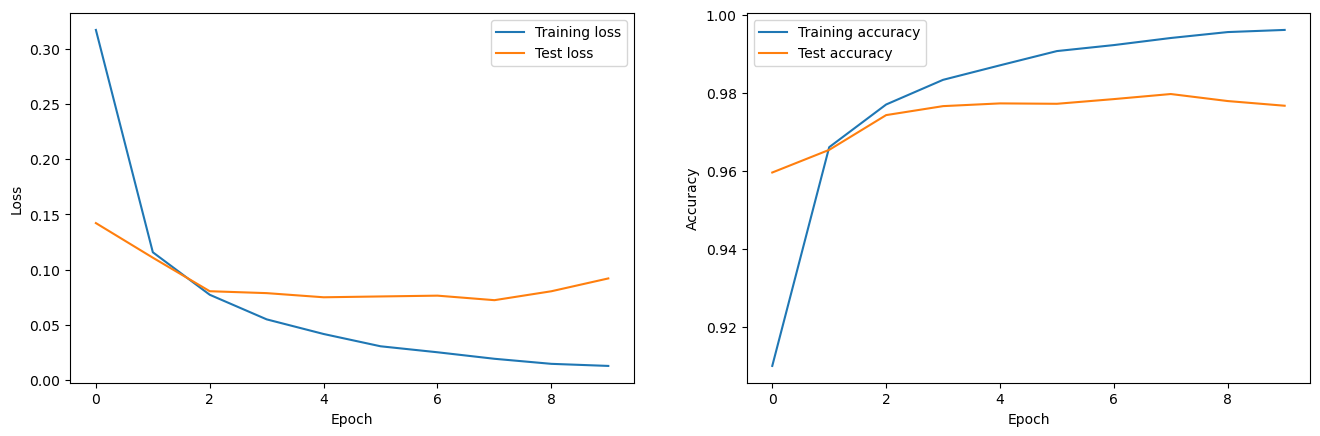

In [7]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Exercise

The most classical example to code in deep learning - the so-called "Hello World" of deep learning - is classification of images of digits: The MNIST dataset. This is very similar to the digits example from our first lecture, but the images are larger and we have more of them. So let's try to see what we can do!

1. Use the $\texttt{mnist}$ dataset (as just shown in the slides). Build a neural network using what we have explored so far and evaluate its performance on the test data.
1. Explore whether your neural network appears to be under- or overfitting by constructing plots of the train and test losses and accuracies during training. Use this information to improve your model - that is, train for longer if it appears to be underfitting and shorter if it appears to be overfitting. Does your test performance improve? What about your train performance?
1. (Bonus): Later during the semester, we will explore *convolutional neural networks*. For those of you finished with (1) and (2), you may try this now to improve your model; check https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D for details.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-nn-mnist.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Fundamental steps/parameters to a successful neural network

**Note**: This list is not exhaustive - we will "add to it" throughout the semester.

1. Use appropriate data, including needed transformations (such as scaling).
1. Use appropriate *architecture*, such as knowing when to use fully connected layers (what we have done today) and when to deviate (a focus of future lectures). Also some trivial choices are here, i.e. use "good" activation functions, output functions, etc., but it also includes considering the optimal width and depth of your network, which is not trivial.
1. A proper loss function. In practice this is very easy - use cross entropy for classification, mean squared error for regression.
1. Use a good optimzier and an appropriate learning rate, batch size, and number of epochs. In practice: Adam with default settings, maybe tuning the learning rate and/or batch size, and keeping track of validation loss while training to know when to stop.
1. Make sure to balance bias and variance so as to neither under- nor overfit. How to do this? Something we will discuss in more detail later.

## Learning rate and batch size in code

1. Setting learning rate: Define optimizer *outside* $\texttt{.compile}$.
1. Setting batch size: Parameter of $\texttt{.fit}$.

**Note**: There is a trade-off between learning rate and batch size, such that a higher batch size allows for the use of a larger learning rate.

In [8]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01)  # similar syntax for Adam, RMSprop, etc.
model.compile(
    optimizer=optimizer,  # before we simply wrote "sgd", "adam", etc. here,
    loss='sparse_categorical_crossentropy')
model.fit(x_train, y_train, batch_size=128, verbose=1)
# the batch size is now 128. Default is 32

469/469 [==============================] - 2s 3ms/step - loss: 0.0068


## Exercise

1. Consider last exercise (i.e. the MNIST data). Suppose you are restricted to **training for only 2 epochs** but still want a good model. You recognize that finding the right learning rate is going to be very important. For this reason, you split your training data into a train and a validation set and use the validation set to find the optimal learning rate. Train a model with you optimized learning rate and evaluate it on your test data.
1. Recognizing that the batch size is also important for training speed, you decide to extend your above analysis to also find the optimal batch size. Once again, train a model with you optimized learning rate *and* batch size and evaluate it on your test data.
1. You have heard that momentum is important. You know that many optimizers already incorporate momentum by default, but you are now forced by your evil teacher to use SGD and otherwise repeat (1) and (2). You decide to extend your above analysis to also find the optimal momentum for SGD (see https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD for how to set it). Once again, train a model with you optimized learning rate, batch size, *and* momentum and evaluate it on your test data.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-nn-lr.ipynb}$). 

## Practicalities of using neural networks

Now, some important practical stuff. Neural networks tend to take a long time to train, so being able to save and load them is important.

This is also helpful if we train for a bit, then take a break, and then want to resume training later. We can simply save the model after the first training, and then load it back when we want to resume.

Further, as we have already looked intro briefly, keeping track of how they do *while* they are training is important (i.e. keeping track of how the training and validation losses and potentially other metrics change during training).

## Saving and loading a model

See https://www.tensorflow.org/guide/keras/save_and_serialize for more details.

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

model.save('my_model')

model_reloaded = tf.keras.models.load_model('my_model')

INFO:tensorflow:Assets written to: my_model\assets


In [10]:
model.summary()
model_reloaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)            

## Using TensorBoard

A really cool (and super helpful) tool to learn is **TensorBoard**. It helps you keep track of metrics (such as losses and accuracies) while training, visualize your neural networks in a cool (and helpful) way, and tons of other things.

Learning to use TensorBoard is a huge help in quickly developing and improving neural networks. It can run *while* you are training, and in that way allows you to tune stuff *even while training*.

Now, as long as your model/data is quite small and training is very fast, these techniques are not crucial. However, when you are training models that take multiple days or even weeks, making sure everything is proceeding as planned during training is important if you don't want to potentially waste weeks of work!

You can run TensorBoard from the command line or alternatively using Python "magic commands".

See https://www.tensorflow.org/tensorboard/get_started and https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks for more details.

In [11]:
import tensorflow as tf
import datetime
(x_train, y_train), (x_test,
                     y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir,
                                                      histogram_freq=1)

model.fit(x_train,
          y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5396 - accuracy: 0.8104 - val_loss: 0.4381 - val_accuracy: 0.8474
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3969 - accuracy: 0.8563 - val_loss: 0.4118 - val_accuracy: 0.8490
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3651 - accuracy: 0.8681 - val_loss: 0.3917 - val_accuracy: 0.8570
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3466 - accuracy: 0.8737 - val_loss: 0.3917 - val_accuracy: 0.8555
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3292 - accuracy: 0.8795 - val_loss: 0.4038 - val_accuracy: 0.8613
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3161 - accuracy: 0.8847 - val_loss: 0.3608 - val_accuracy: 0.8718
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3067 - accuracy: 0.8865 - val_loss: 0.3598 - val_accuracy

In [14]:
# this (starting with %) is called a "magic command"

#%load_ext tensorboard
#%tensorboard --logdir log_dir --port 2345

## Exercise

1. Use the $\texttt{fashion_mnist}$ dataset (classification of images of cloths). Train a neural network to classify the images, **training only for 2 epochs**. Evaluate its performance. Now save it. Reload it (with a new name) and perform evaluation again (to check it is the same). Train the reloaded model for 2 epochs. Evaluate. See how its performance is better now - this is since it has trained for 4 total epochs now.
1. Train a model aiming at as good performance as possible, using a combination of what we have covered so far in class, optimization of hyperparameters (remember to use a validation set), and any other ideas you have. Track the performance of your final model using TensorBoard.

**Hint**: You may use the notebook I have uploaded under this lecture as a starting point ($\texttt{exercise-nn-saveload.ipynb}$). It provides some of the code, and you then have to fill in the rest. You do not have to use it - it is there if you think it might be helpful!

## Some "rule-of-thumbs" and good defaults

We've covered a lot of stuff, and the number of parameters can easily seem overwhelming. Luckily, there are some empirically validated "good choices" for a lot of the parameters. Let's discuss some of those!

1. Activations: ReLU in hidden layers. Output layer: Softmax for classification, linear for regression.
1. Optimizers: Adam with default settings, perhaps tuning the learning rate.
1. Loss functions: Cross entropy for classification, mean squared error for regression.
1. Scaling/data prep: Almost always crucial to scale features. Occasionally target for regression problems.
1. Batch size: 32 (default) tends to work, but it may be slow. To speed up training, one often scales up the batch size as far as your computer can. In these cases, using an increased learning rate is recommended. However, batch sizes can become "too large" so do not go crazy.

## Advantages and disadvantages of NNs

Advantages

1. Neural networks can model just about everything, including associations that DTs and SVMs may have trouble modelling.
1. They work well on both structured and unstructured data.
1. Achieves SOTA for a large range of problems, especially when data size is large and/or when data is unstructured.

Disadvantages

1. Even though neural networks can in theory model nearly everything, actually reaching this state is nontrivial.
1. Neural networks are difficult to interpret ("black boxes").
1. Neural networks are prone to overfit (but ways to combat this).
1. Neural networks are somewhat difficult to use.

## Summary and looking ahead

In this/these lectures we:

1. Used neural networks to solve classification and regression problems using Python.
1. Discussed the general structure of neural networks and which choices are generally "good".
1. Discussed optimization of neural networks, including optimizers, learning rates, batch sizes, and more.
1. Learned to save and load neural networks and how to use TensorBoard.

Great! What's next?

We'll move on to various tricks to better train neural networks, including combating overfitting and speeding up training. These techniques will prove crucial to obtain good performance.